In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
%matplotlib inline

In [ ]:
sample_size = 100
alpha = 0.95

### Генерируем выборки

In [72]:
uniform_sample = sps.uniform.rvs(loc=0, scale=1, size=sample_size)
cauchy_sample = sps.cauchy.rvs(loc=0, scale=1, size=sample_size)
poisson_sample = sps.poisson.rvs(mu=1, size=sample_size)
gamma_sample = sps.gamma.rvs(10, 1, size=sample_size)

### Воспользуемся теоритическими выкладками с семинаров
### Доверительные интервалы для равномерного распределения:
### Для $\overline{X}$ :

In [16]:
conf_interv_left1 = [2.*uniform_sample[: i + 1].mean()/(1+2.*((1./12/(i+1)/(1.-alpha)))**(1./2)) for i in range(sample_size)]
conf_interv_right1 = [2.*uniform_sample[: i + 1].mean()/(1-2.*((1./12/(i+1)/(1.-alpha)))**(1./2)) for i in range(sample_size)]

#### Для ${X}_{(1)}$:

In [17]:
conf_int_left2 = [np.min(uniform_sample[: i + 1]) for i in range(sample_size)]
conf_int_right2 = [conf_int_left2[i]*1./(1-alpha**(i + 1)) for i in range(sample_size)]

### Для ${X}_{(n)}$:

In [22]:
conf_int_left3 = [np.max(uniform_sample[: i + 1]) for i in range(sample_size)]
conf_int_right3 = [conf_int_left3[i]*1./(1-alpha**(i + 1)) for i in range(sample_size)]

### Построим графики доверительных интервалов 

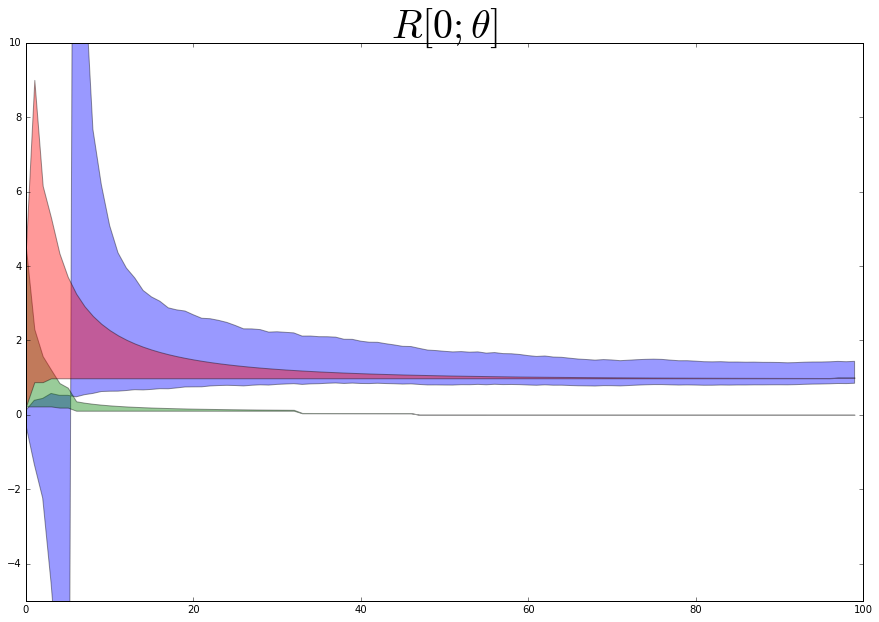

In [78]:
plt.figure(figsize = (15, 10))
plt.ylim(-5, 10)
plt.title(r'$R[0; \theta]$', fontsize=40)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_interv_left1, conf_interv_right1, facecolor='blue', alpha = 0.4)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_int_left2, conf_int_right2, facecolor='green', alpha = 0.4)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_int_left3, conf_int_right3, facecolor='red', alpha = 0.4)


### Для распределения Коши
### Посчитаем медиану

In [38]:
med = []
for i in range(sample_size):
    arr = np.sort(cauchy_sample[: i + 1])
    
    if ((i+1)%2 == 0): 
        med.append((arr[i/2] + arr[i/2 + 1])/2) 
    else:
        med.append(arr[i/2])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Посчитаем квантиль уровня $\frac{1+\alpha}{2}$:

In [63]:
distr_func = np.array(sps.norm.cdf(np.arange(-10, 10, 0.01)))
for i in range(distr_func.size):
    if (distr_func[i] >= (1 + alpha) / 2) :
        q = i * 0.01 - 10
        break

### Строим доверительные интервалы

In [64]:
conf_interv_left4 = [med[i] - q * (math.pi / 2) / math.sqrt(i + 1) for i in range(sample_size)]
conf_interv_right4 = [med[i] + q * (math.pi / 2) / math.sqrt(i + 1) for i in range(sample_size)]

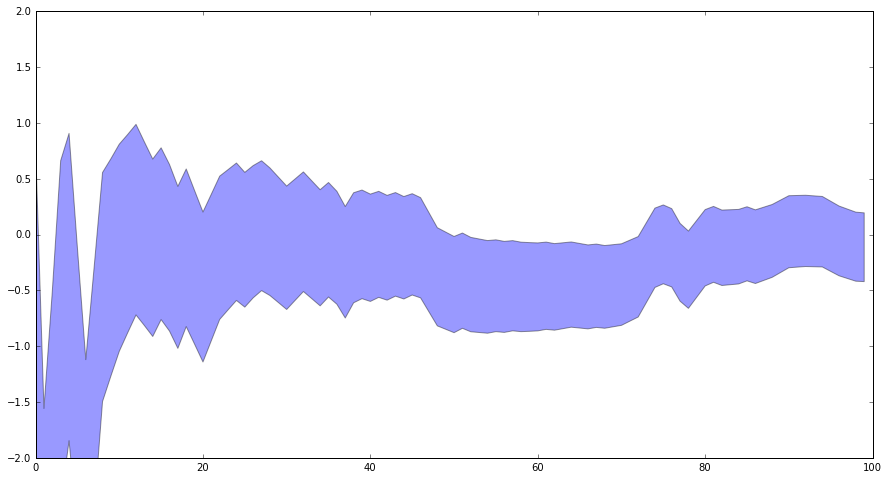

In [65]:
# строим график
plt.figure(figsize = (15, 8))
plt.ylim(-2, 2)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_interv_left4, conf_interv_right4, facecolor='blue', alpha = 0.4)

### Пуассоновское распределение

In [67]:
conf_interv_left5 = [poisson_sample[:i+1].mean() - q * poisson_sample[:i+1].mean() / math.sqrt(i+1) for i in range(sample_size)]
conf_interv_right5 = [poisson_sample[:i+1].mean() + q * poisson_sample[:i+1].mean() / math.sqrt(i+1) for i in range(sample_size)]

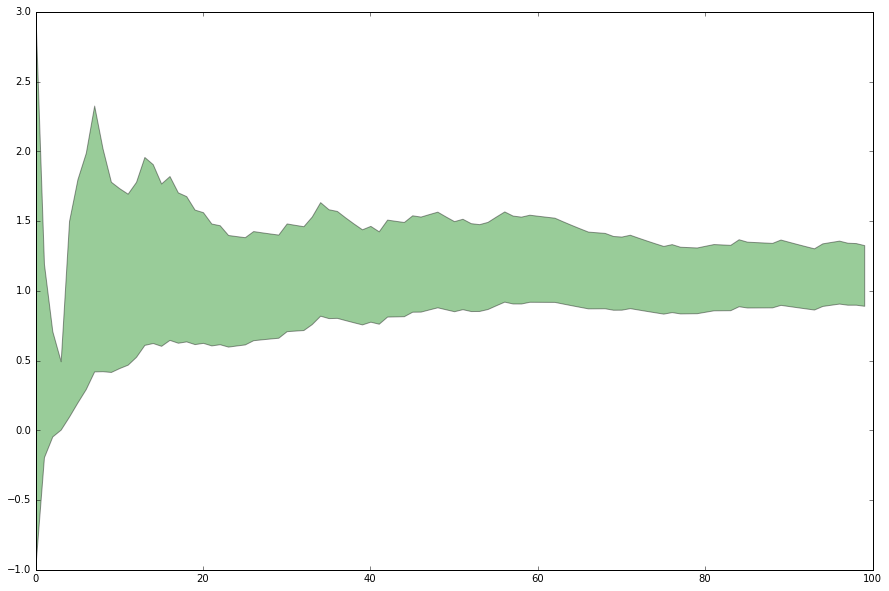

In [71]:
plt.figure(figsize = (15, 10))
plt.ylim(-1, 3)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_interv_left5, conf_interv_right5, facecolor='green', alpha = 0.4)

### Для гамма распределения

In [73]:
lambda_ = 10

conf_interval_left6 = [lambda_ / gamma_sample[:i+1].mean() - q * ((lambda_ / gamma_sample[:i+1].mean()) ** 3) / math.sqrt(i + 1) 
                       for i in range(sample_size) ] 
conf_interval_right6 = [lambda_ / gamma_sample[:i+1].mean() + q * ((lambda_ / gamma_sample[:i+1].mean()) ** 3) / math.sqrt(i + 1) 
                        for i in range(sample_size) ] 

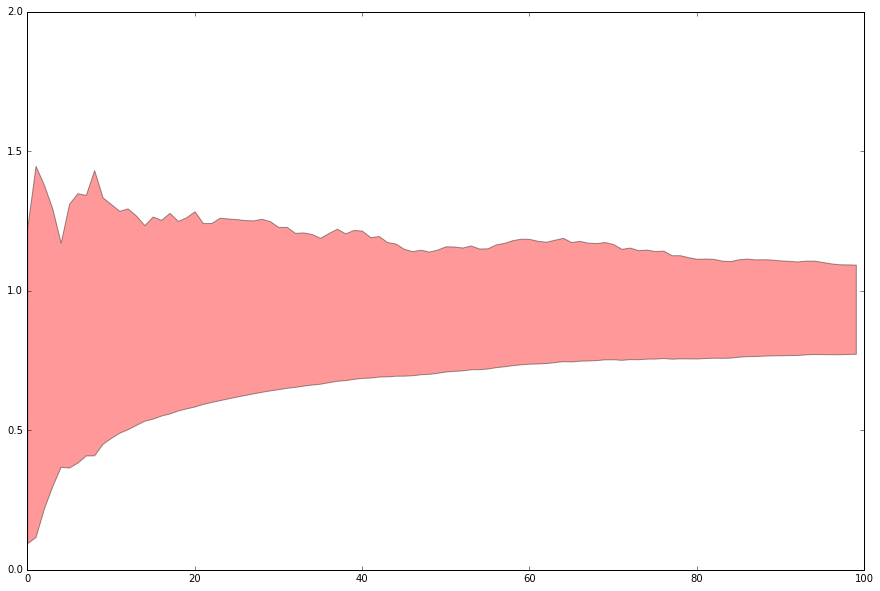

In [74]:
plt.figure(figsize = (15, 10))
plt.ylim(0,2)
plt.matplotlib.pyplot.fill_between(range(sample_size), conf_interval_left6, conf_interval_right6, facecolor='red', alpha = 0.4)